In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Membaca dataset
#Path ke file CSV (sesuaikan dengan lokasi file di komputer Anda)
file_path = r"C:\Users\aekmo\Desktop\archive (1)\Iris.csv"

#Membaca dataset
iris_df = pd.read_csv(file_path)

#Simpan label target ke dalam variabel y_true
y_true = iris_df['Species'].values

#Encode label untuk perbandingan
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

#Hilangkan kolom target (Species) untuk K-Means
X = iris_df.drop(columns=['Species']).values

In [13]:
from sklearn.cluster import KMeans

#Terapkan K-Means dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

C:\Users\aekmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
from sklearn.metrics import confusion_matrix

#Buat Confusion Matrix awal
conf_matrix_original = confusion_matrix(y_true_encoded, y_kmeans)
print("Confusion Matrix (Original):\n", conf_matrix_original)

Confusion Matrix (Original):
 [[ 1  0 49]
 [49  1  0]
 [ 0 50  0]]


In [17]:
from scipy.optimize import linear_sum_assignment
import numpy as np

#Fungsi untuk menyelaraskan cluster
def align_labels(y_kmeans, y_true_encoded):
    contingency = confusion_matrix(y_true_encoded, y_kmeans)
    row_ind, col_ind = linear_sum_assignment(-contingency)
    
    # Petakan ulang label cluster
    y_kmeans_aligned = np.zeros_like(y_kmeans)
    for i in range(len(col_ind)):
        y_kmeans_aligned[y_kmeans == col_ind[i]] = row_ind[i]
    
    return y_kmeans_aligned, contingency

#Selaraskan label
y_kmeans_aligned, conf_matrix_aligned = align_labels(y_kmeans, y_true_encoded)

#Confusion Matrix setelah penyelarasan
conf_matrix_new = confusion_matrix(y_true_encoded, y_kmeans_aligned)
print("\nConfusion Matrix (Setelah Penyelarasan):\n", conf_matrix_new)


Confusion Matrix (Setelah Penyelarasan):
 [[49  1  0]
 [ 0 49  1]
 [ 0  0 50]]


In [19]:
from sklearn.metrics import accuracy_score

#Hitung akurasi
accuracy = accuracy_score(y_true_encoded, y_kmeans_aligned)
print(f"\nAkurasi setelah penyelarasan: {accuracy:.4f}")


Akurasi setelah penyelarasan: 0.9867


In [21]:
from sklearn import metrics

#Silhouette Score (lebih tinggi lebih baik, rentang -1 sampai 1)
silhouette = metrics.silhouette_score(X, y_kmeans)
print(f"\nSilhouette Score: {silhouette:.4f}")

#Davies-Bouldin Index (lebih rendah lebih baik)
davies_bouldin = metrics.davies_bouldin_score(X, y_kmeans)
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

#Calinski-Harabasz Index (lebih tinggi lebih baik)
calinski_harabasz = metrics.calinski_harabasz_score(X, y_kmeans)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")


Silhouette Score: 0.5817
Davies-Bouldin Index: 0.5016
Calinski-Harabasz Index: 587.1283


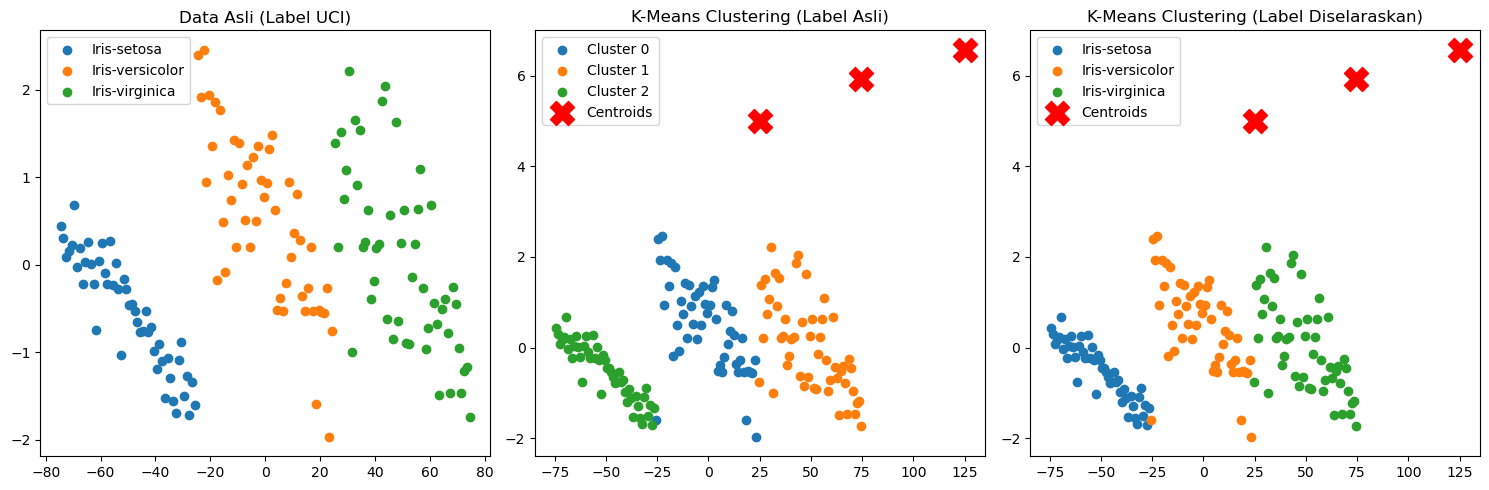

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduksi/mensederhanakan dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(15, 5))

#Plot 1: Data Asli
plt.subplot(1, 3, 1)
for i in range(3):
    plt.scatter(X_pca[y_true_encoded == i, 0], X_pca[y_true_encoded == i, 1], label=label_encoder.inverse_transform([i])[0])
plt.title('Data Asli (Label UCI)')
plt.legend()

#Plot 2: K-Means Clustering (sebelum penyelarasan)
plt.subplot(1, 3, 2)
for i in range(3):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (Label Asli)')
plt.legend()

#Plot 3: K-Means Clustering (setelah penyelarasan)
plt.subplot(1, 3, 3)
for i in range(3):
    plt.scatter(X_pca[y_kmeans_aligned == i, 0], X_pca[y_kmeans_aligned == i, 1], label=label_encoder.inverse_transform([i])[0])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (Label Diselaraskan)')
plt.legend()

plt.tight_layout()
plt.show()